<a href="https://colab.research.google.com/github/marcellapbp/Aprendendo-Python/blob/master/Dataquest_Guided_Project_Exploring_I94_Highway_Traffic_Volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explorando o tráfego da Rodovia Interestadual 94 (I-94)

Através de dados públicos [neste link](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#) vamos estudar o volume de tráfego da [Rodovia Interestadual 94 (I-94)](https://en.wikipedia.org/wiki/Interstate_94). Mais especificamente o trecho localizado em Minnesota entre Mineápolis e Saint Paul no sentido oeste, sendo assim os insights aqui gerados não se aplicam a I-94 em sua totalidade.

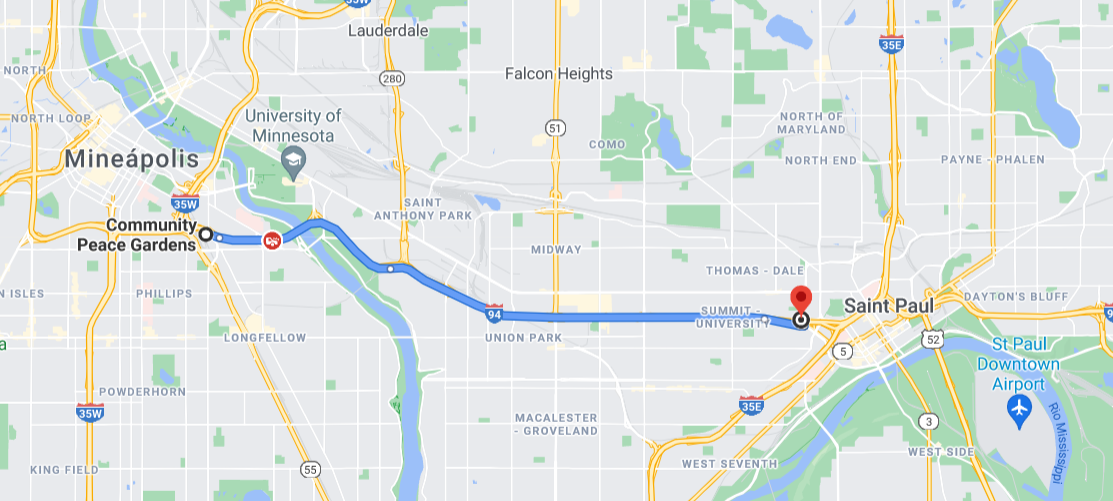

Informações contidas no dataset:

| Campo | Significado|
|-------|------------|
|holiday| Feriados nacionais e/ou feriados locais de Minnesota|
|temp| Temperatura média em kelvin|
|rain_1h| Volume em mm de chuva acumulada em 1 hora|
|snow_1h| Volume em mm de neve acumulada em 1 hora|
|clouds_all| Percentual de cobertura de nuvens|
|weather_main| Descrição abreviada do clima atual|
|weather_description| Descrição longa do clima atual|
|date_time| Data e hora em que os dados foram coletados no padrão CST|
|traffic_volume| Volume do tráfego reportado|

##Leitura do Dataset
Iniciando leitura dos dados:

In [1]:
#importando bibliotecas
import pandas as pd

#lendo direto da URL e descomprimindo dados com extenção .gz
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz', compression='gzip')
#selecionando uma amostra de 10 linhas para conferir resultado
df.sample(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
861,None,268.99,0.0,0.0,40,Clouds,scattered clouds,2012-11-03 08:00:00,3246
6166,None,287.15,0.0,0.0,90,Rain,light rain,2013-05-19 10:00:00,3591
44363,None,294.09,0.0,0.0,1,Drizzle,light intensity drizzle,2018-05-25 01:00:00,430
22988,None,291.84,0.0,0.0,20,Haze,haze,2016-05-02 18:00:00,4148
2979,None,269.28,0.0,0.0,1,Clear,sky is clear,2013-01-16 18:00:00,4425
15909,None,289.23,0.0,0.0,1,Mist,mist,2014-08-05 07:00:00,6886
19751,None,274.58,0.0,0.0,90,Mist,mist,2015-11-30 16:00:00,5147
26091,None,288.61,0.0,0.0,90,Fog,fog,2016-08-28 00:00:00,1510
26274,None,287.59,0.0,0.0,1,Clear,sky is clear,2016-09-03 05:00:00,677
40820,None,274.86,0.0,0.0,75,Clouds,broken clouds,2018-01-20 20:00:00,3497


Com o método ```info``` observamos que existe um total de mais de **48 mil linhas** e **nenhuma das colunas possui valores nulos**. Temos dados do tipo int, float e object.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Convertendo a data para um formato melhor de trabalhar

In [3]:
df['date_time'] = pd.to_datetime(df['date_time'])

Vamos iniciar a exploração com auxílio de gráficos, para isso importar a biblioteca Matplotlib

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

##Análise da Distribuição do Tráfego
Notamos que a **frequência maior** é de um **volume menor de tráfego**, apesar de haver um pico na frequência por volta do volume de 3 mil e 5 mil carros.

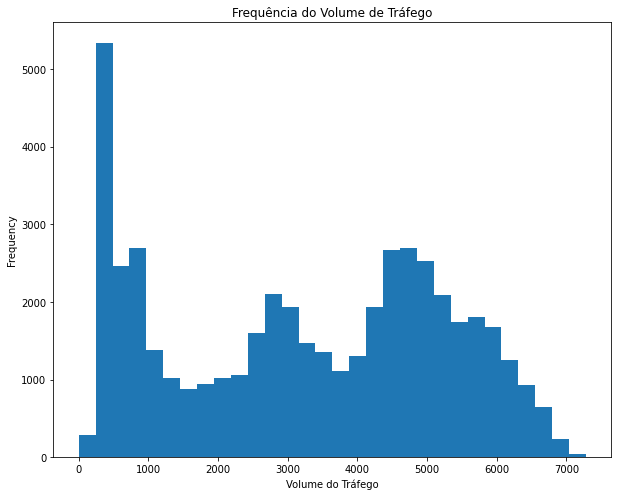

In [5]:
plt.figure(figsize=(10,8))
df['traffic_volume'].plot.hist(bins=30)
plt.title('Frequência do Volume de Tráfego');
plt.xlabel('Volume do Tráfego')
plt.show()

No trecho abaixo é possível simular o que o gráfico acima realizou. 
<BR><BR>
Na estatística é comum utilizamos uma tabela de frequência, no intuito de compreender quantas vezes um evento se repete. Como estamos analisando números, os valores tem uma maior variedade e é mais fácil dividir em intervalos, então o parâmetro ```bins``` determina o tamanho da nossa tabela, ou no caso do gráfico da quantidade de barras.
<BR><BR>
Um histograma, justamente por representar intervalos que se ligam, é diferente de um gráfico de barras, suas barras não possuem espaço entre elas para representar a continuidade.

In [6]:
df['traffic_volume'].value_counts(bins=30).sort_index()

(-7.281000000000001, 242.667]     287
(242.667, 485.333]               5333
(485.333, 728.0]                 2475
(728.0, 970.667]                 2695
(970.667, 1213.333]              1377
(1213.333, 1456.0]               1028
(1456.0, 1698.667]                874
(1698.667, 1941.333]              944
(1941.333, 2184.0]               1017
(2184.0, 2426.667]               1054
(2426.667, 2669.333]             1601
(2669.333, 2912.0]               2110
(2912.0, 3154.667]               1928
(3154.667, 3397.333]             1468
(3397.333, 3640.0]               1365
(3640.0, 3882.667]               1105
(3882.667, 4125.333]             1298
(4125.333, 4368.0]               1946
(4368.0, 4610.667]               2653
(4610.667, 4853.333]             2701
(4853.333, 5096.0]               2532
(5096.0, 5338.667]               2082
(5338.667, 5581.333]             1739
(5581.333, 5824.0]               1813
(5824.0, 6066.667]               1670
(6066.667, 6309.333]             1250
(6309.333, 6

Usando o método ```describe``` temos outra forma de utilizar conceitos estatísticos para fazer a mesma observação que fizemos acima. É possível perceber que **cerca de 25% dos dados reportados são com volume de tráfego abaixo de 2 mil carros**.

In [7]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

###Distribuição acordo com o período: Dia x Noite

Uma **hipótese** sobre a diferença no tráfego em alguns momentos com **pouca movimentação de carros** e horas com muita movimentação pode estar relacionado com o **horário** de cada resultado capturado. <BR>
Sendo assim vamos dividir entre **dia** e **noite**, sendo:
* Dia das 7 às 18 hrs, e 
* Noite das 19 às 6 hrs.

In [8]:
#listando as horas para conferir que está no padrão 24 hrs
import numpy as np
np.sort(df['date_time'].dt.hour.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [9]:
#dividindo em dois datasets
day = df[df['date_time'].dt.hour.between(7,18)]
night = df[(df['date_time'].dt.hour.between(0,6)) | (df['date_time'].dt.hour.between(19,23))]

In [10]:
#amostra resultado do dia
day.sample(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
12700,None,268.87,0.0,0.0,20,Clouds,few clouds,2014-03-05 15:00:00,5760
9706,None,270.56,0.0,0.0,64,Mist,mist,2013-11-08 08:00:00,5722
1135,None,272.09,0.0,0.0,90,Mist,mist,2012-11-12 11:00:00,4245


In [11]:
#amostra resultado da noite
night.sample(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
45439,None,300.08,0.0,0.0,1,Clear,sky is clear,2018-06-30 06:00:00,1489
12037,None,253.14,0.0,0.0,1,Clear,sky is clear,2014-02-05 22:00:00,1448
37462,None,288.15,0.0,0.0,90,Rain,light rain,2017-09-25 21:00:00,2029


Conferindo limite de horários de cada dataset para garantir que a divisão funcionou

In [12]:
np.sort(day['date_time'].dt.hour.unique())

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [13]:
np.sort(night['date_time'].dt.hour.unique())

array([ 0,  1,  2,  3,  4,  5,  6, 19, 20, 21, 22, 23])

Agora conseguimos retomar a análise do nosso histograma sem misturar resultados do dia e noite sendo possível analisar melhor os dados. Vemos que de fato durante **a noite é mais comum o menor fluxo de carros que é praticamente o oposto do que acontece durante o dia.**

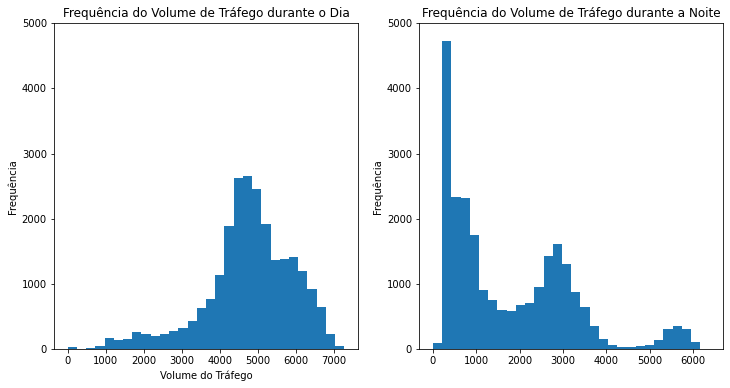

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
day['traffic_volume'].plot.hist(bins=30)
plt.title('Frequência do Volume de Tráfego durante o Dia');
plt.xlabel('Volume do Tráfego')
plt.ylabel('Frequência')
plt.ylim(0,5000)

plt.subplot(1,2,2)
night['traffic_volume'].plot.hist(bins=30)
plt.title('Frequência do Volume de Tráfego durante a Noite');
plt.ylabel('Frequência')
plt.ylim(0,5000)

plt.show()


Olhando novamente o método ```describe``` fica mais evidente, cerca de **75% dos dados durante o dia se concentra em um maior fluxo acima de 4 mil carros**, enquanto que **à noite 75% representa um menor fluxo nos resultados reportados abaixo de 3000 carros**.

In [15]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

##Progressão do Tráfego de acordo com o período
Com as descobertas feitas acima, analisando de que forma os dados estão distribuídos, podemos **desconsiderar os dados da noite** que não possuem alto volume de tráfego, sendo esse o tema principal para nossa análise.
<BR>
Nessa seção vamos analisar de que forma o **tráfego evoluiu** de acordo com:
* o Mês,
* o Dia da Semana, e
* a Hora do Dia.

E para demonstrar essa evolução ao longo do tempo nada melhor que um gráfico de linhas.

###Progressão por Mês

In [17]:
#gerando dados agrupados por mês
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

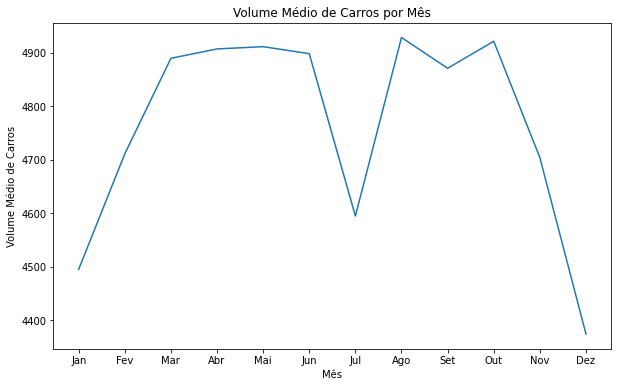

In [18]:
plt.figure(figsize=(10,6))
plt.title('Volume Médio de Carros por Mês')
plt.xlabel('Mês')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], 
           labels=['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
plt.ylabel('Volume Médio de Carros')
plt.plot(by_month['traffic_volume'])
plt.show()

Com o gráfico acima notamos que no **início**, **meio** e **final** do ano o volume de carros tende a ser menor. <BR>
Em outras palavras o pico de movimentação está no meio dos semestres. Com relação ao início e final do ano pode estar atrelado ao clima, época de nevascas, festas e recesso. E no meio do ano também é um período de férias, nos EUA percebemos que o meio do ano parece ser na verdade o fim e início de uma temporada.
<BR><BR>
Vamos agora criar um gráfico seguindo o mesmo raciocínio, mas para dias da semana

###Progressão por Dia da Semana

In [19]:
#gerando dados agrupados por dia da semana
day['day_of_week'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('day_of_week').mean()
by_dayofweek['traffic_volume']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

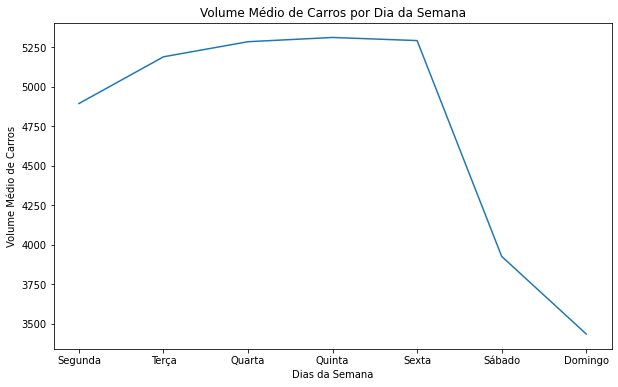

In [20]:
plt.figure(figsize=(10,6))
plt.title('Volume Médio de Carros por Dia da Semana')
plt.xlabel('Dias da Semana')
plt.xticks(ticks=[0,1,2,3,4,5,6], 
           labels=['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo'])
plt.ylabel('Volume Médio de Carros')
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

No resultado acima, notamos que a partir de **sexta** costuma cair o volume até o menor volume no **domingo** e volta e recuperar no **segunda**. Provavelmente isso ocorre devido sábado e domingo serem dias de descanso.
<BR><BR>
Para finalizar vamos analisar o gráfico por hora do dia. Aqui precisamos de um tratamento diferenciado, pois o volume de carros de acordo com os horários do dia pode variar muito em dias úteis e fins de semana e como estamos trabalhando com a média acabaria neutralizando os resultados.

###Progressão por Hora (Dias úteis vs Fim de Semana)

In [21]:
#gerando dados agrupados por hora do dia
day['hour'] = day['date_time'].dt.hour

business_day = day[day['day_of_week']<= 4] #menor igual a sexta
weekend      = day[day['day_of_week'] > 4] #maior que sexta

by_hour_business = business_day.groupby('hour').mean()
by_hour_weekend  = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


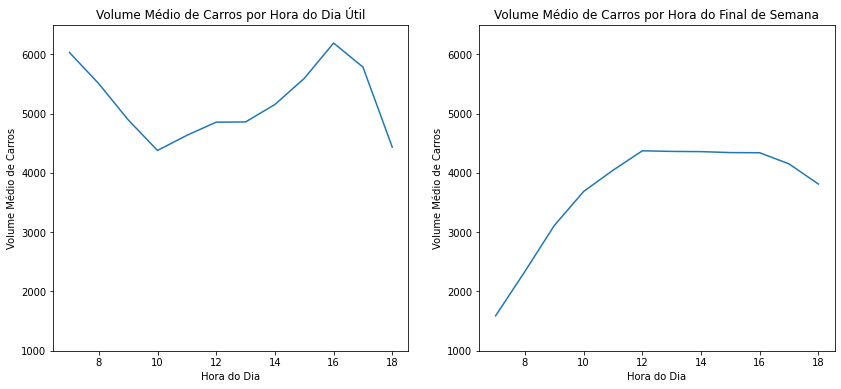

In [22]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Volume Médio de Carros por Hora do Dia Útil')
plt.xlabel('Hora do Dia')
plt.ylabel('Volume Médio de Carros')
plt.ylim(1000,6500)
plt.plot(by_hour_business['traffic_volume'])

plt.subplot(1,2,2)
plt.title('Volume Médio de Carros por Hora do Final de Semana')
plt.xlabel('Hora do Dia')
plt.ylabel('Volume Médio de Carros')
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim(1000,6500)
plt.show()



Comparando a evolução do tráfego ao longo do dia de forma separada é possível criar novas hipóteses.

É muito provável que **durante a semana** o **pico** seja logo no **início da manhã**, pois as pessoas estão se locomovendo ao **trabalho ou estudo**, e na **parte da tarde** para **retornar para casa**.

Já nos **finais de semana** o gráfico faz uma longa curva **aumentando o tráfego gradativamente** e **diminuindo no final da tarde**, o que pode indicar que muitas pessoas saem de casa para **lazer** por exemplo de forma **bem distribuída**, e no final do dia é o momento que estão **retornando para casa**. 

Ainda assim no **final de semana o volume é bem menor** que durante a semana o que **indica que muito mais pessoas costumam não sair de casa**, provavelmente aproveitam o dia de descanso. Note que para chegar a essa conclusão foi importante padronizar o eixo y dos gráficos para a mesma medida, senão parecia antes que os valores eram similares.

##Correção entre o Clima e o Volume de Tráfego

Uma **hipótese** é que o **clima influencia ou está correlacionado com o volume de carros**. Pode ser que as pessoas evitam sair de casa durante tempestades de chuva ou neve, ou ficam mais estimuladas a sair de casa durante um dia ensolarado.

Existe um cálculo que podemos utilizar através do método ```corr``` que indica o quanto **2 atributos estão correlacionados**. Não cabe nesse projeto determinar como esse cálculo funciona, mas é importante saber que o resultado varia entre -1 e 1, onde -1 indica que são negativamente relacionados (quando um aumenta outro diminui), 0 indica que não estão relacionados, e por fim 1 indica que estão positivamente relacionados (quando um aumenta o outro também aumenta).

Outro ponto importante ressaltar é que **correlação não implica em causalidade**, pode ser que um causa o outro ou pode ser um terceiro fator que causa ambos ou apenas uma coincidência. Aqui estamos estudando se existe correlação, seria necessário um estudo dedicado a isso para investigar a causa.

In [23]:
day.loc[:,'temp':'traffic_volume'].corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000


A tabela acima ainda assim não é tão agradável de fazer uma leitura, pois é difícil de mentalizar quais características estão correlacionadas, quais estão mais e quais estão menos. Mesmo com poucas colunas podemos utilizar um gráfico **heatmap** para visualizar melhor a correlação.

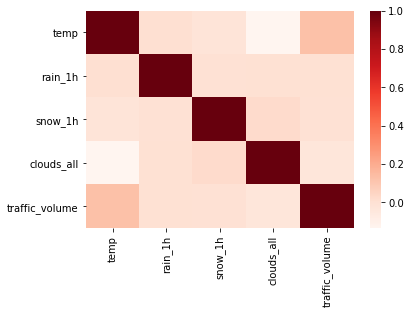

In [84]:
import seaborn as sns

sns.heatmap(day.loc[:,'temp':'traffic_volume'].corr(), cmap='Reds');

No gráfico acima temos as esmas informações da função ```corr``` porém de forma mais visual, **quanto mais escuro o tom de vermelho mais relacionado**. É característico ter uma linha na diagonal com total correlação, pois é onde os próprios atributos cruzam com eles mesmos sendo sempre iguais.

Vamos que num geral **a correlação entre as variáveis do clima e o tráfego não são muito fortes**, exceto a **temperatura**. Então vamos focar nesses 2 atributos.

###Correlação entre Temperatura e Volume de Tráfego

Apesar da correlação que enxergamos no heatmap acima, olhando mais de perto essas **duas variáveis através de um scatterplot não parece ter uma relação forte**, os dados estão bem distribuídos, o tráfego é intenso independentemente da temperatura.
Vale lembrar que a temperatura está usando a escala Kevin, convertendo para Celsius o intervalo de temperatura fica em torno de -30 a 40°.

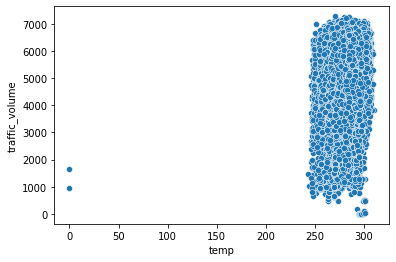

In [46]:
sns.scatterplot(x=day['temp'],
                y=day['traffic_volume'])

##Relação entre Clima e Volume (Dados Categóricos)

Da forma que analisamos acima, focamos nos dados numéricos, mas o dataset possui informações relacionadas ao **clima** de forma escrita, **são categorias como chuva, neve, névoa, céu limpo** e etc.
Então vamos ver qual o volume médio de tráfego de acordo com essas categorias.


In [78]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

print(by_weather_main['traffic_volume'])
print(by_weather_description['traffic_volume'])

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64
weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light inte

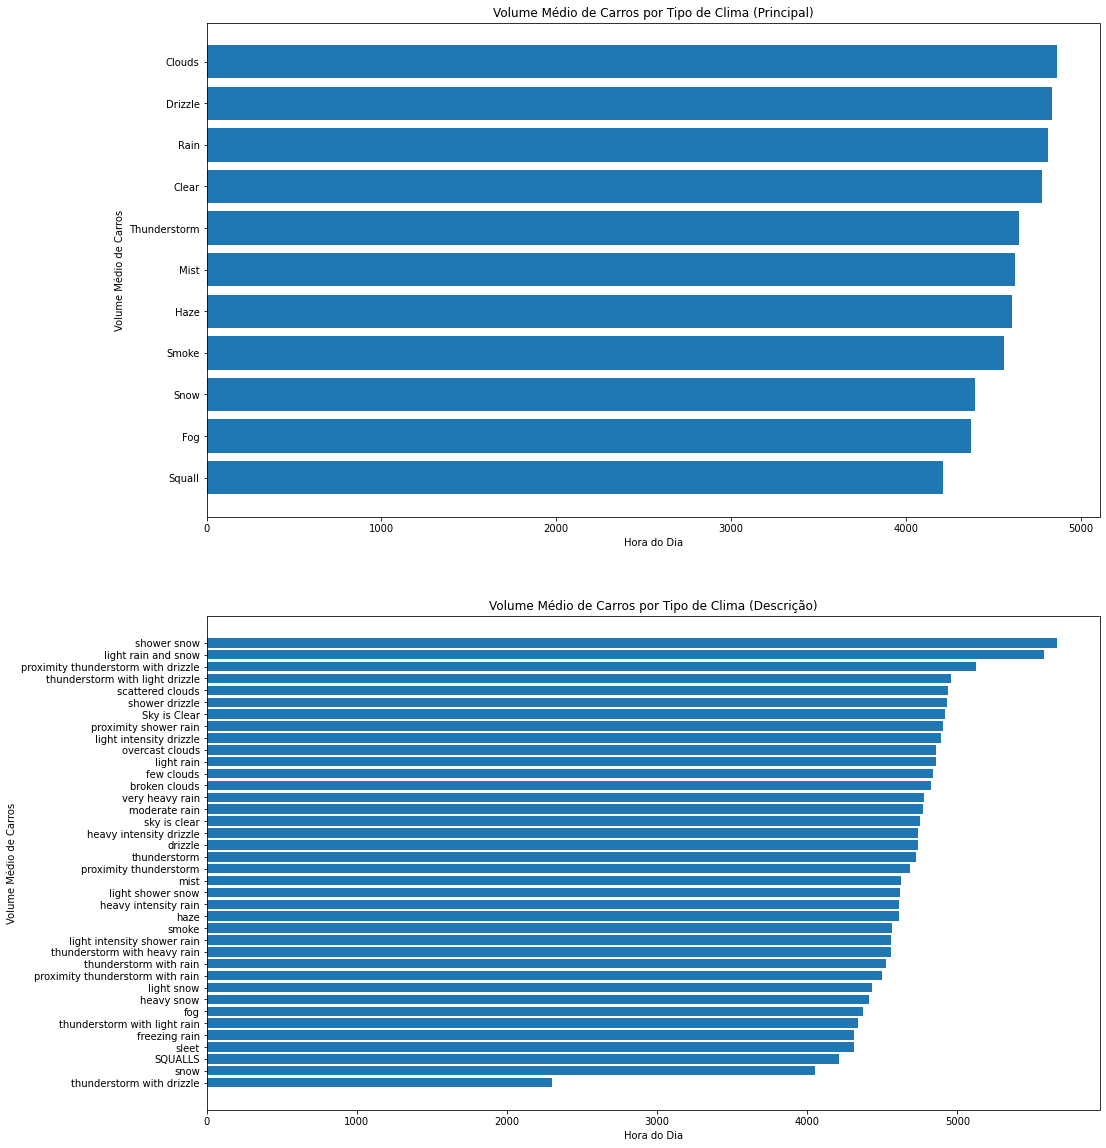

In [83]:
plt.figure(figsize=(16,20))

plt.subplot(2,1,1)
plt.title('Volume Médio de Carros por Tipo de Clima (Principal)')
plt.xlabel('Hora do Dia')
plt.ylabel('Volume Médio de Carros')
plt.barh(by_weather_main['traffic_volume'].sort_values().index,
         by_weather_main['traffic_volume'].sort_values())

plt.subplot(2,1,2)
plt.title('Volume Médio de Carros por Tipo de Clima (Descrição)')
plt.xlabel('Hora do Dia')
plt.ylabel('Volume Médio de Carros')
plt.barh(by_weather_description['traffic_volume'].sort_values().index,
         by_weather_description['traffic_volume'].sort_values())
plt.show()


Para concluir nossas análises percebemos que o **tipo de clima** que mais está relacionado com **alto tráfego** são:

* Neve
* Chuva Leve e Neve
* Tempestade próxima com garoa

# Considerações Finais

Após investigar o dataset, criar hipóteses e desenhar gráficos para facilitar a análise, conseguimos criar **2 tipos de indicadores**:
* Indicadores de Tempo
* Indicadores de Clima

<BR>

**Indicadores de Tempo**
Alta intensidade de tráfego durante:
* o meio dos semestres
* dias úteis
* o período diurno

**Indicadores de Clima**
Alta intensidade de tráfego quando o clima está:
* com neve
* com chuva leve e neve
* com tempestade próxima com garoa

<BR>

É possível dar continuidade de várias formas no que foi analisado, mas por enquanto finalizamos aqui.